### Investigate the activities of options
   * w.r.t. two dimensions
       * strike price
       * Time to maturity
   
   * We mainly use three indicators to measure option activities
       * avg number of trades per hour
       * avg number of mid price change per hour
       * avg number of weighted mid price change per hour
       
   * use one week's data, Mon to Sun
       * divide t2m in hours, so t2m is in range 1 - 168
   
   * procedure
       * load trade and quote data
       * for each day, we get the consolidated result DF
       * combine seven days DFs
       * make scatter plot

In [24]:
from cdcqr.data.dataloader import data_loader
from cdcqr.data.deribit.data_utils import DeribitUtils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from cdcqr.data.deribit.data_utils import get_option_activities

In [12]:
date_range = list(pd.date_range(start='2021-10-04',
    end='2021-10-10',))

In [13]:
dates_str = [x.strftime('%Y-%m-%d') for x in date_range]
print(dates_str)

['2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10']


In [14]:
res_dict = {}
for date in dates_str:
    res_dict[date] = get_option_activities(date)

'parse_optSymbol_col'  11.32 sec
'parse_time_col'  4.10 sec
'parse_optSymbol_col'  8.86 sec
'parse_optSymbol_col'  10.49 sec
'parse_time_col'  3.33 sec
'parse_optSymbol_col'  9.00 sec
'parse_optSymbol_col'  7.67 sec
'parse_optSymbol_col'  4.15 sec
'parse_optSymbol_col'  5.45 sec


In [16]:
df = pd.concat(res_dict.values())

In [19]:
df1 = df.groupby(['strike','t2m'])['has_trade','midp_chg','wgtmidp_chg'].mean()

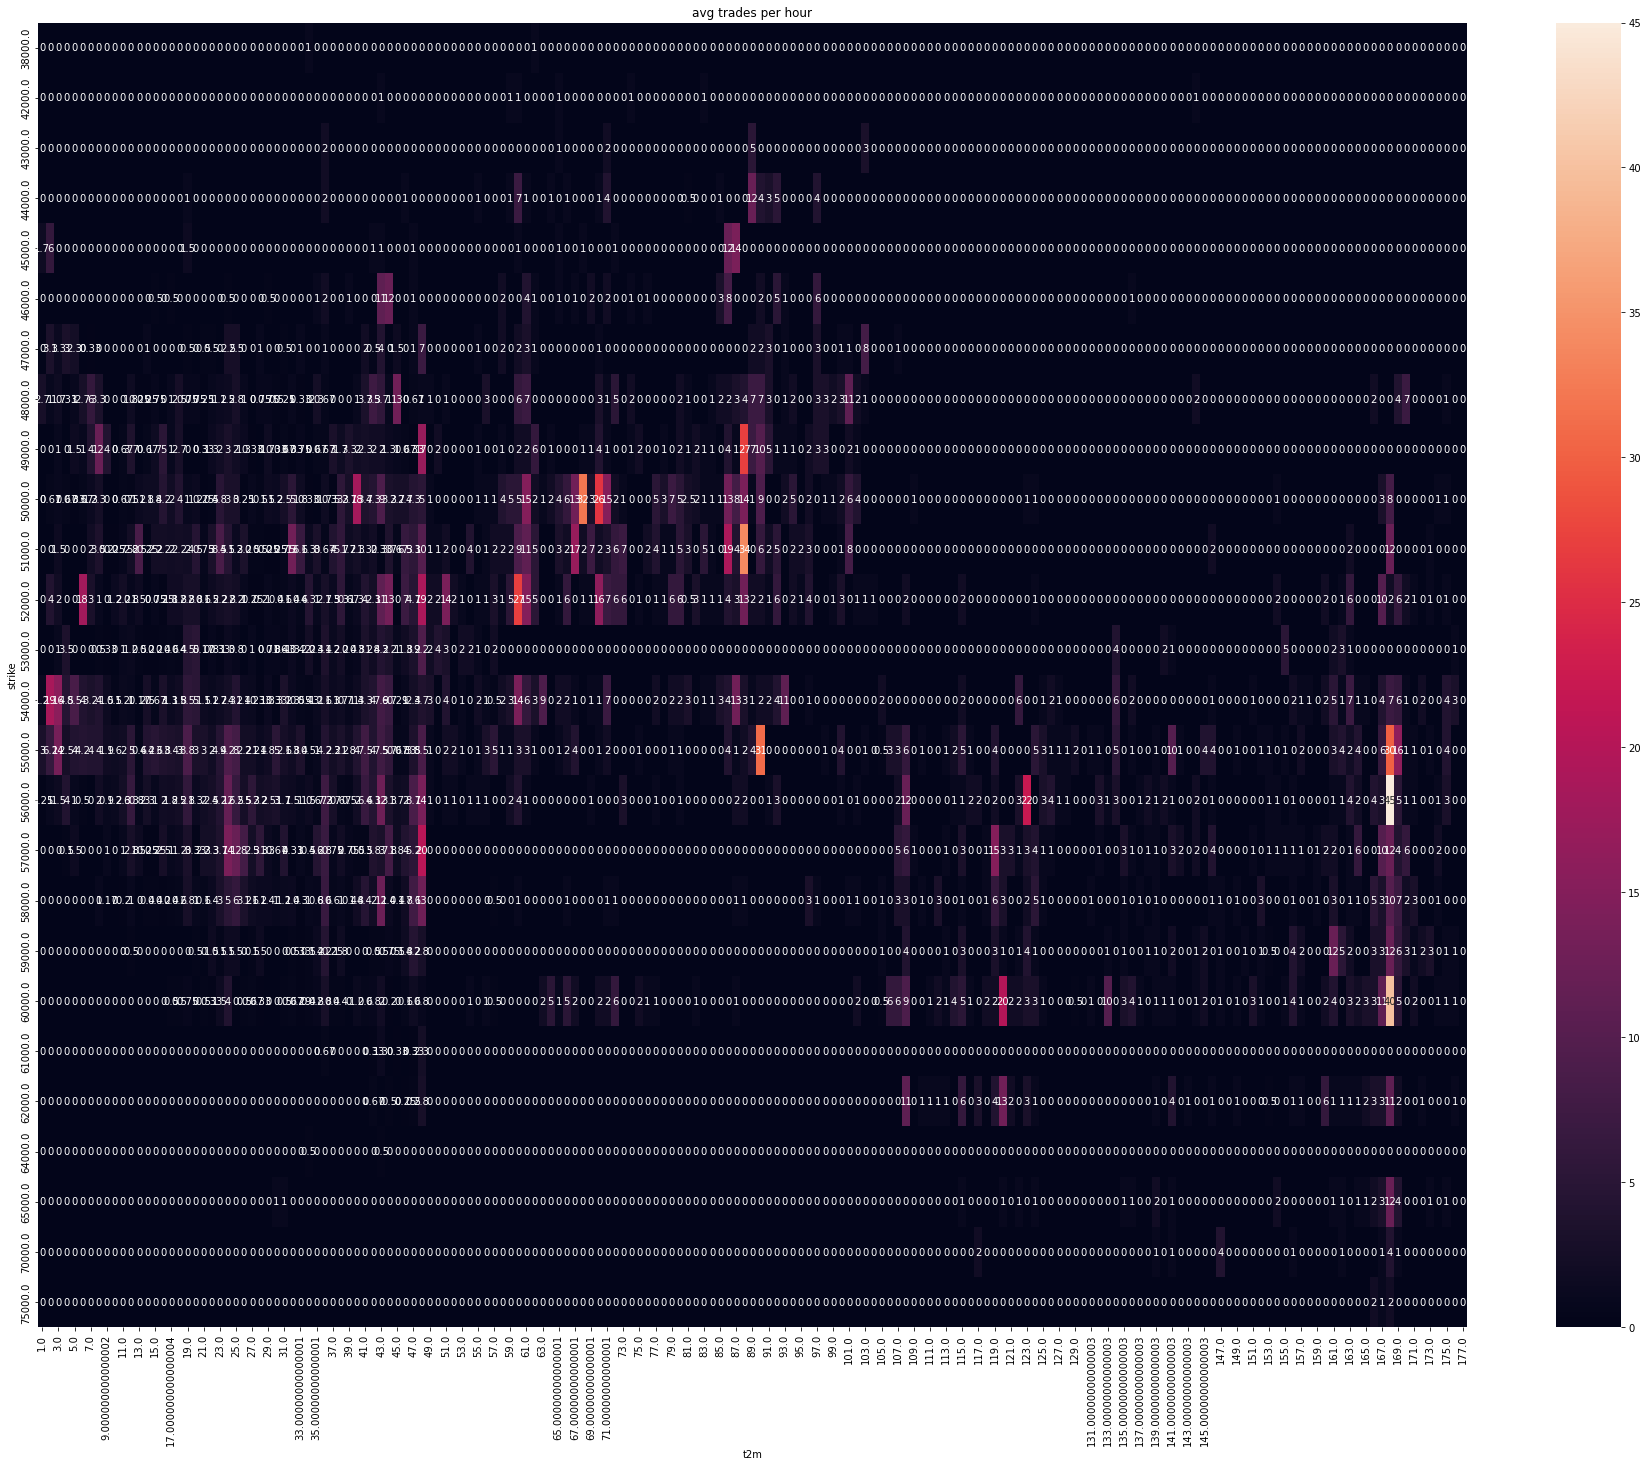

In [41]:
has_trade_heat_map = df1['has_trade'].unstack().fillna(0)
fig = plt.figure(figsize=(32,24))
ax = sns.heatmap(has_trade_heat_map, annot=True)
plt.title('avg trades per hour')
figure = ax.get_figure()    
plt.show()

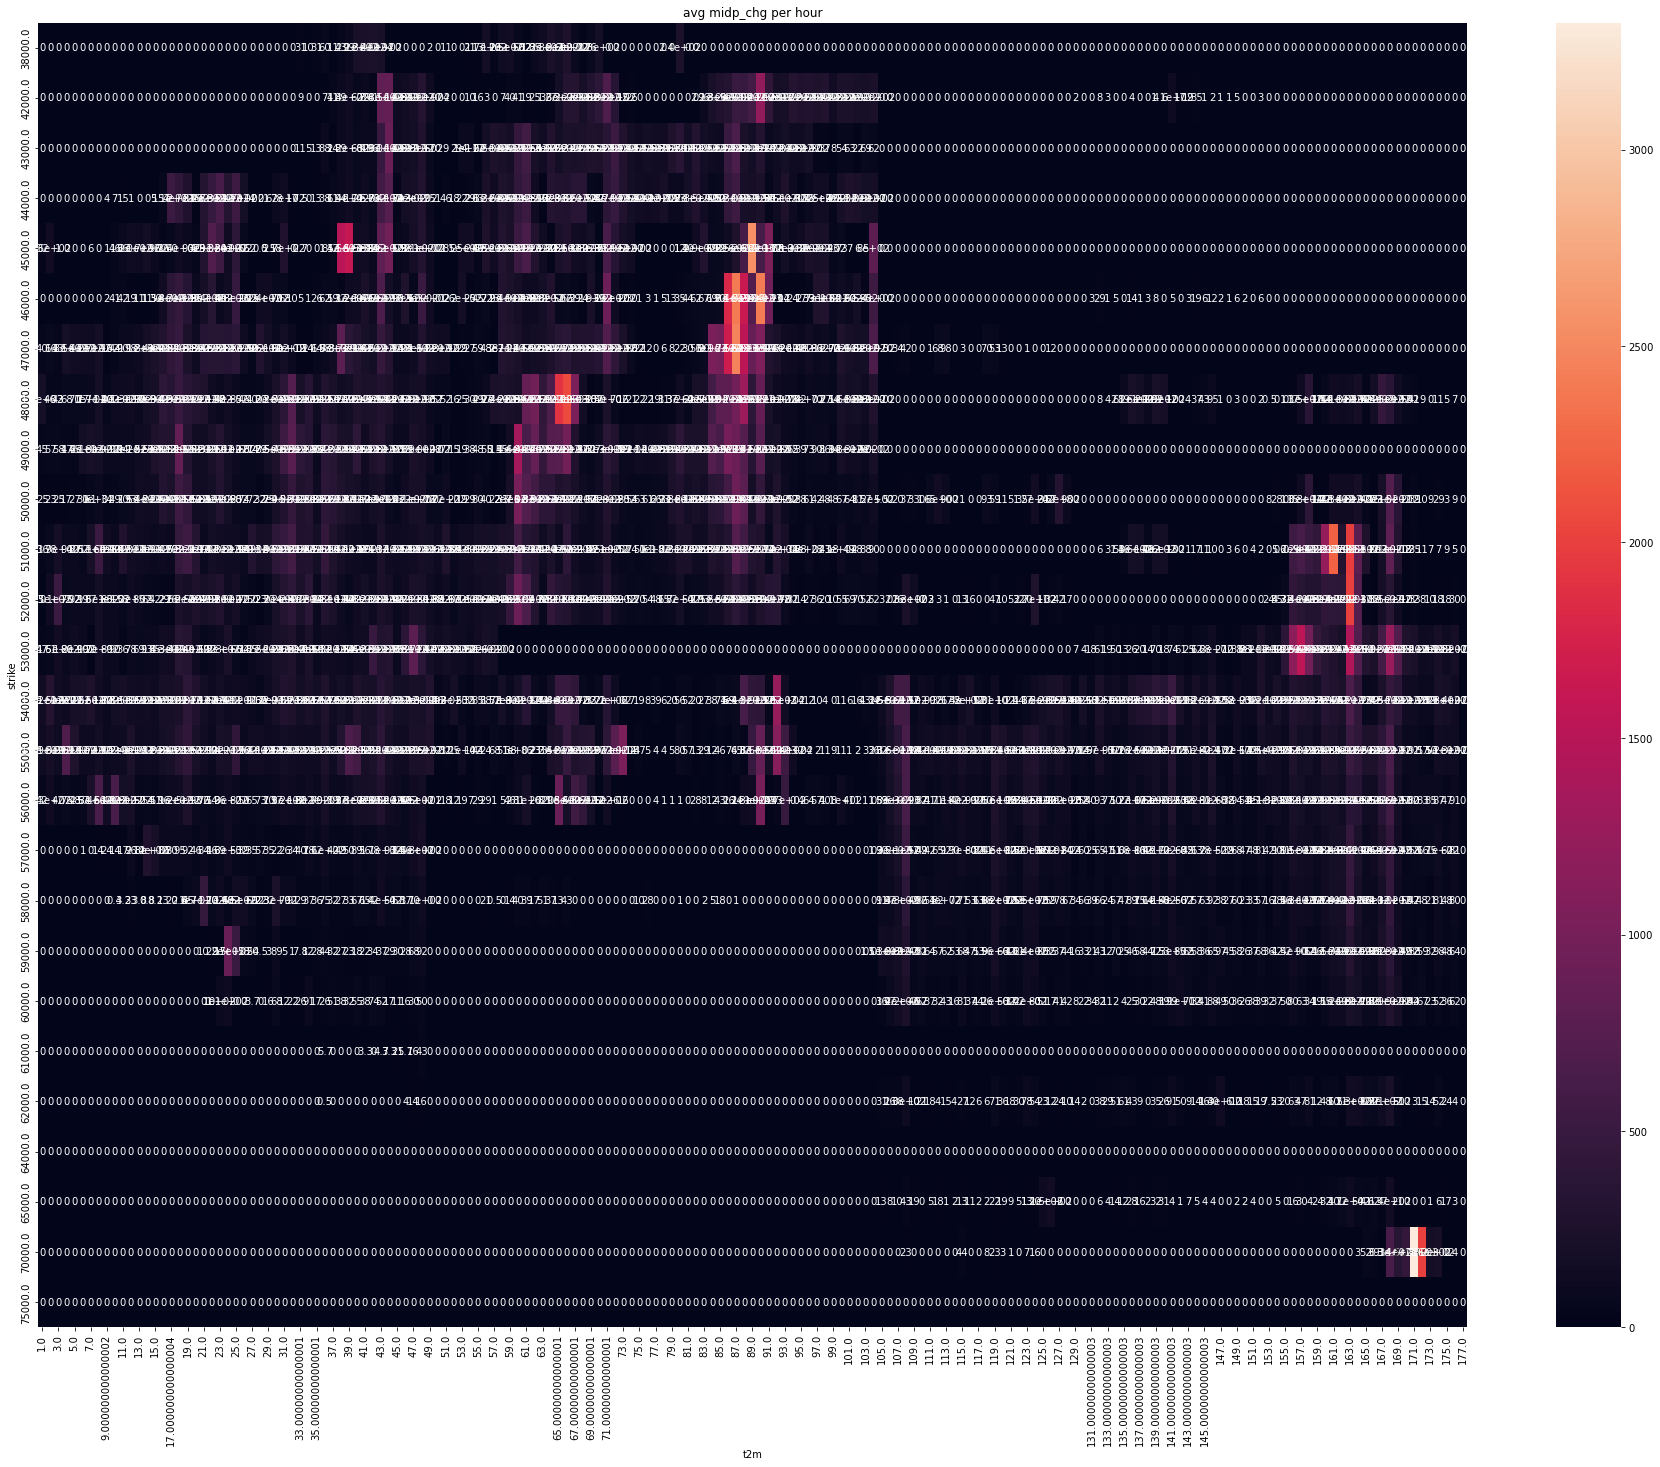

In [45]:
midp_chg_heat_map = df1['midp_chg'].unstack().fillna(0)
fig = plt.figure(figsize=(32,24))
ax = sns.heatmap(midp_chg_heat_map, annot=True)
plt.title('avg midp_chg per hour')
figure = ax.get_figure()    
plt.show()

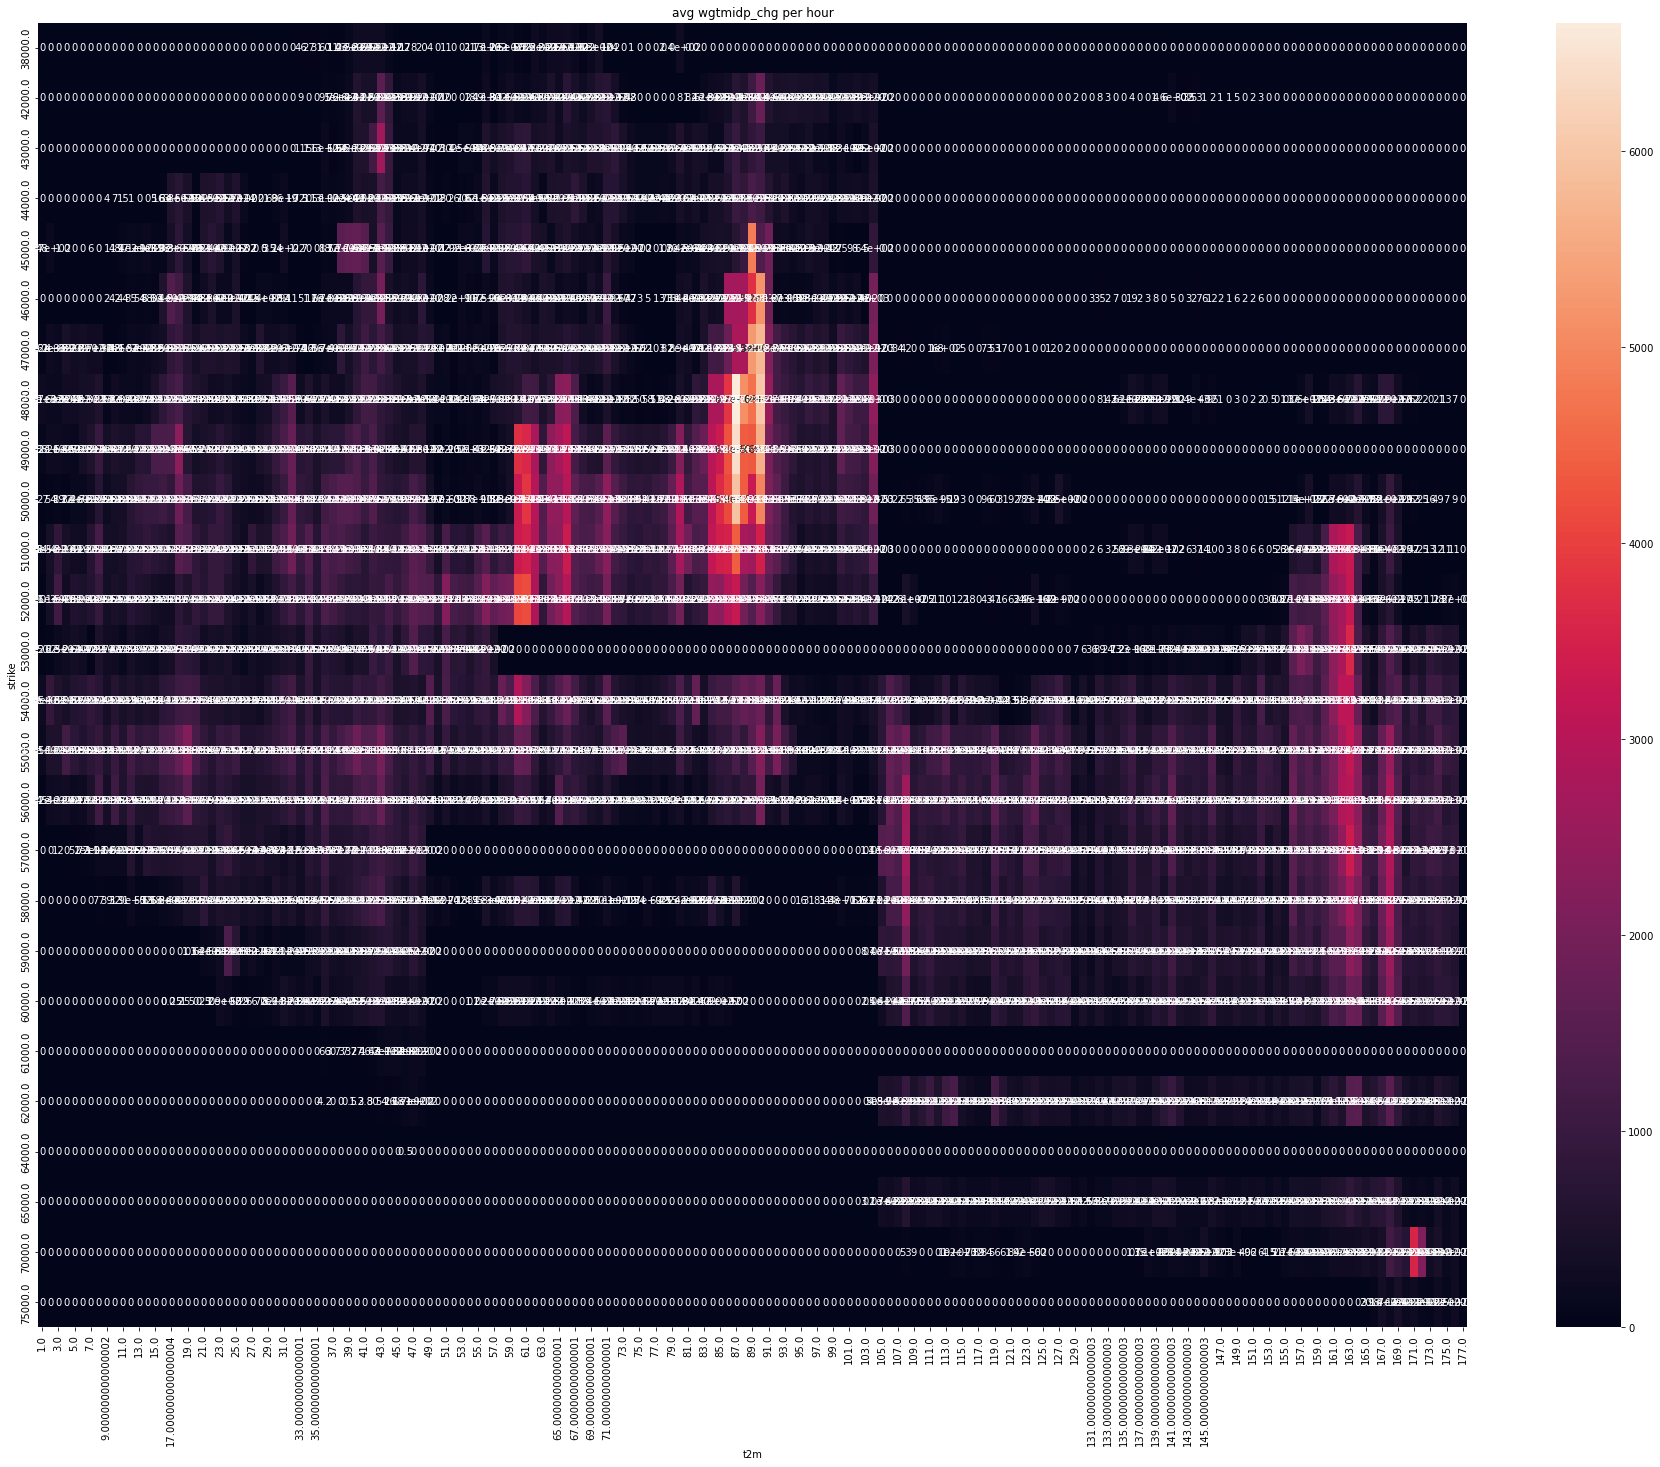

In [46]:
wgtmidp_chg_heat_map = df1['wgtmidp_chg'].unstack().fillna(0)
fig = plt.figure(figsize=(32,24))
ax = sns.heatmap(wgtmidp_chg_heat_map, annot=True)
plt.title('avg wgtmidp_chg per hour')
figure = ax.get_figure()    
plt.show()